In [ ]:
import pickle

with open('dataframes.pkl', 'rb') as file:
    data = pickle.load(file)

yk_full = data['yk_full']
yk_dropped = data['yk_dropped']

In [2]:
yk_full

In [3]:
yk_full_filled = yk_full.fillna(0)

In [4]:
yk_full_filled

,Name,Target,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,...,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm
0,temperature,Other,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
1,Device_Test_Time,Outlier/Longtail,longtail,1.830048e-16,0.252373,1.000007,0.443438,-6.338681,49.533672,-12.225994,...,21.460831,-0.983337,0.079063,46.533672,0.687064,-5.402994,1197,69577,0.310838,0.000000
2,Part_Id,Outlier/Longtail,longtail,1.045742e-16,-0.129072,1.000007,1.597451,0.435881,-0.729177,-1.427618,...,3.920412,-1.302537,0.016112,-3.729177,2.352655,-1.418352,0,0,0.076701,0.000000
3,g2bist_efuse_blank_read_f_:Functional[1],Other,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
4,tdf_50k_2_f_:Functional[1],Other,functional,-5.551115e-17,-0.577350,1.154701,0.577350,1.154701,-0.666667,-0.577350,...,2.309401,-2.400000,0.250000,-3.666667,1.662769,-0.577350,0,4,0.468149,0.249377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,tdf_90k_5_p_:Functional[1],Other,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
1021,tdf_90k_6_p_:Functional[1],Other,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
1022,tdf_90k_7_p_:Functional[1],Other,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000
1023,tdf_90k_8_p_:Functional[1],Other,functional,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.000000,0.000000


In [5]:
# encoding the target variable into numerical value (binary)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(yk_full_filled['Target'])

In [6]:
from sklearn.model_selection import train_test_split

columns_to_drop = ['Target', 'Name', 'Distribution Type', 'Target_Encoded']
X = yk_full_filled.drop(columns = columns_to_drop)
y = y_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training model with full dataset and without any feature crossing / dropping

In [7]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [8]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9121951219512195
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       105
           1       0.90      0.92      0.91       100

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



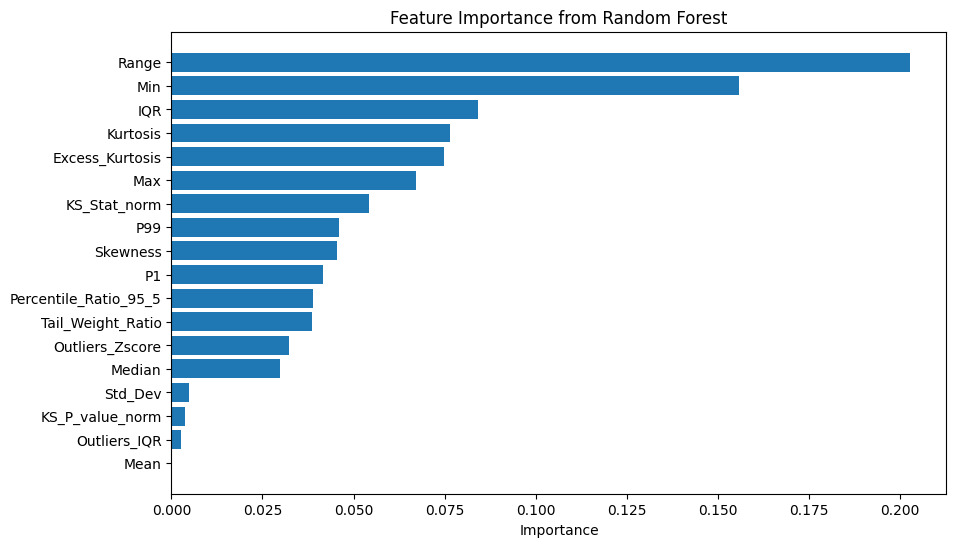

In [10]:
import pandas as pd
import matplotlib as plt

importances = model.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

# Feature visualization

In [15]:
positive_class_mask = (y_test == 1) # filter down to only the positive class
positive_recalled = (y_pred[positive_class_mask] == y_test[positive_class_mask]).astype(int) # recall vs unrecalled in positive class

X_test_positive = X_test[positive_class_mask].copy()  # select only positive class rows
X_test_positive['Recalled'] = positive_recalled # add column wherer 1 is recall and 0 is unrecalled

# identify the difference in features between recalled and unrecalled to determine why it is not captured by the model 

In [ ]:
# import seaborn as sns 

# for feature in X_test_positive.columns[:-1]:  # skip the 'Recalled' column
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x='Recalled', y=feature, data=X_test_positive)
#     plt.xticks(ticks=[0, 1], labels=["Unrecalled", "Recalled"])
#     plt.title(f'Boxplot of {feature}')
#     plt.show()

In [24]:
# for positive class (outlier/longtail)
unrecalled_mask = (y_test == 1) & (y_pred != 1)
unrecalled_points = X_test[unrecalled_mask]

recalled_mask = (y_test == 1) & (y_pred == 1)
recalled_points = X_test[recalled_mask]

# for negative class (other distributions)
negative_mask = (y_test == 0) & (y_pred == 0)
negative_points = X_test[negative_mask]

In [36]:
# check the actual distribution type of unrecalled points
yk_full_filled.iloc[unrecalled_points.index] 

,Name,Target,Distribution Type,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,...,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm
290,io18_pspd_high_pre_:dc_ioleakage@ATEST2[1],Outlier/Longtail,longtail,-4.200560e-14,-0.292166,1.000007,1.556025,0.439025,-0.825846,-2.408359,...,7.717882,-1.304774,0.021496,-3.825846,2.259715,-1.661467,8,0,0.124685,0.000000e+00
289,io18_pspd_high_pre_:dc_ioleakage@ATEST1[1],Outlier/Longtail,longtail,-1.111313e-13,-0.058764,1.000007,1.268141,0.354691,-0.191540,-2.753563,...,7.291810,-1.178162,0.089119,-3.191540,2.398259,-1.960975,27,0,0.077159,0.000000e+00
986,read_dro_cal_:lvt_avg@TDO[1],Outlier/Longtail,longtail,-1.935976e-15,0.063400,1.000007,1.403359,-0.388876,0.348104,-5.582783,...,9.184296,-0.877230,0.033191,-2.651896,2.026222,-2.505583,331,0,0.031423,8.893522e-60
352,io18_pszz_low_pre_:dc_ioleakage@PCIE_CLKN[1],Outlier/Longtail,longtail,2.316552e-13,0.193092,1.000007,1.577805,-0.167263,-0.871140,-2.619517,...,5.488017,-0.866171,0.002327,-3.871140,1.976697,-1.933515,0,0,0.108797,0.000000e+00
863,rfu_tx_pmax_4915_AB_:LSBSupression_dBc@2G5GTR_...,Outlier/Longtail,longtail,9.819963e-14,-0.091689,1.000008,1.285451,0.627821,0.920611,-3.095073,...,10.043603,-1.202929,0.052628,-2.079389,2.803140,-1.949422,477,0,0.038170,2.520707e-83
983,rcal_cau_rd_05:REG_VALUE@TDO[1],Outlier/Longtail,longtail,-8.217692e-16,-0.021239,1.000007,1.179242,0.086042,0.628793,-3.558965,...,8.844314,-1.250965,0.059085,-2.371207,2.533785,-2.772803,233,0,0.081484,0.000000e+00
526,rfu_rx_gstep_2412_A_:biquad_lpf_12db@2G5GTR_A[1],Outlier/Longtail,longtail,6.583248e-14,0.010747,1.000008,1.101479,-0.050802,-0.168533,-3.192491,...,5.694370,-0.982747,0.128932,-3.168533,2.199002,-2.220751,5,0,0.050786,1.948087e-147
110,brf_dut_devm_:rx_m14_devm_ch0@TDO[1],Outlier/Longtail,longtail,5.815678e-16,-0.023449,1.000008,1.378596,0.253289,-0.087170,-3.240173,...,9.483070,-1.133403,0.034382,-3.087170,2.399538,-2.070455,138,0,0.030258,5.709006e-53


In [21]:
unrecalled_points.describe() # 8 points

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm
count,8.000000e+00,8.000000,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.0,8.000000,8.000000e+00
mean,3.004678e-14,-0.027508,1.000007e+00,1.343762,0.144241,-0.030840,-3.306366,4.662055,7.968420,-1.099547,0.052645,-3.030840,2.324545,-2.134372,152.375000,0.0,0.067845,7.136258e-54
std,1.031906e-13,0.138145,1.987104e-07,0.168812,0.337978,0.640320,0.992230,1.583758,1.719234,0.169281,0.040366,0.640320,0.270938,0.355607,179.481744,0.0,0.036039,2.018438e-53
min,-1.111313e-13,-0.292166,1.000007e+00,1.101479,-0.388876,-0.871140,-5.582783,2.501879,5.488017,-1.304774,0.002327,-3.871140,1.976697,-2.772803,0.000000,0.0,0.030258,0.000000e+00
25%,-1.195338e-14,-0.066995,1.000007e+00,1.245916,-0.079917,-0.350116,-3.319871,3.418260,6.892450,-1.214938,0.030267,-3.350116,2.155807,-2.291959,7.250000,0.0,0.036483,0.000000e+00
50%,-1.201007e-16,-0.022344,1.000007e+00,1.332023,0.169665,-0.127852,-3.143782,4.911798,8.281098,-1.155783,0.043505,-3.127852,2.328987,-2.015715,82.500000,0.0,0.063973,9.740435e-148
75%,7.392427e-14,0.023910,1.000008e+00,1.441525,0.375774,0.418276,-2.720052,5.542867,9.258990,-0.956367,0.066593,-2.581724,2.433100,-1.945445,257.500000,0.0,0.088312,2.223381e-60
max,2.316552e-13,0.193092,1.000008e+00,1.577805,0.627821,0.920611,-2.408359,6.948530,10.043603,-0.866171,0.128932,-2.079389,2.803140,-1.661467,477.000000,0.0,0.124685,5.709006e-53


In [22]:
recalled_points.describe() # 92 points

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm
count,9.200000e+01,92.000000,9.200000e+01,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01
mean,-2.239708e-14,-0.026784,1.000008e+00,1.220243,-9.783906,1951.301686,-34.357039,12.930751,47.287790,-1.121696,0.049876,1948.301686,2.096315,-1.966046,259.695652,5954.706522,0.086357,1.299679e-02
std,5.361205e-13,0.139126,1.619444e-07,0.384312,36.693126,6282.996953,42.791263,27.770654,49.546667,0.301439,0.041193,6282.996953,0.585549,0.700692,432.015612,19408.619015,0.103634,7.820183e-02
min,-2.507384e-12,-0.745631,1.000007e+00,0.131319,-170.866417,-1.096752,-198.429891,0.709779,4.363679,-2.760089,0.000395,-4.096752,0.571973,-4.532855,2.000000,0.000000,0.002858,0.000000e+00
25%,-1.207198e-13,-0.044698,1.000008e+00,1.150936,-3.745406,0.448824,-47.139266,3.401627,11.408667,-1.194457,0.032831,-2.551176,1.962828,-2.288584,43.750000,0.000000,0.017497,0.000000e+00
50%,2.361823e-17,-0.009018,1.000008e+00,1.298090,-0.191551,18.992052,-15.712988,4.415416,34.102518,-1.047651,0.045183,15.992052,2.274089,-2.169612,158.500000,0.000000,0.038261,7.747680e-83
75%,1.888519e-13,0.006798,1.000008e+00,1.342159,0.203133,278.076466,-5.840876,6.536538,62.076857,-0.999942,0.053270,275.076466,2.415737,-1.704070,212.000000,0.000000,0.114966,2.539018e-17
max,1.309922e-12,0.396948,1.000008e+00,1.961446,160.482471,35701.713870,-1.272076,219.816872,265.242062,-0.187160,0.225069,35698.713870,3.253290,-0.247835,2587.000000,69567.000000,0.414055,6.566710e-01


In [25]:
negative_points.describe() # 95 points

,Mean,Median,Std_Dev,IQR,Skewness,Kurtosis,Min,Max,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,Outliers_IQR,KS_Stat_norm,KS_P_value_norm
count,9.500000e+01,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,9.500000e+01
mean,-1.054460e-14,-0.025721,0.749221,0.886945,4.609805,920.079510,-2.819822,7.478567,10.298389,-0.782427,0.049103,917.837405,1.544155,-1.455787,152.589474,2836.031579,0.105079,2.850187e-02
std,3.351283e-13,0.190783,0.438197,0.642478,30.105763,7295.230529,3.284383,29.805620,29.806906,0.725337,0.058898,7295.134043,1.095989,1.107009,392.259507,13583.820191,0.137586,1.409939e-01
min,-1.067968e-12,-0.807573,0.000000,0.000000,-3.583873,-1.814493,-23.589177,0.000000,0.000000,-2.772342,0.000000,-4.814493,-0.057260,-4.622672,0.000000,0.000000,0.000000,0.000000e+00
25%,-2.660347e-14,-0.081756,0.500004,0.000000,0.000000,-0.131846,-3.867343,0.135250,1.022926,-1.183279,0.000000,-3.131846,0.000000,-2.275593,0.000000,0.000000,0.001100,0.000000e+00
50%,0.000000e+00,0.000000,1.000008,1.146726,0.001987,0.000000,-2.938284,3.531936,7.242483,-0.983052,0.038723,-2.750623,2.191660,-1.807103,24.000000,0.000000,0.056733,0.000000e+00
75%,4.038849e-15,0.019367,1.000008,1.342776,0.430606,0.243852,-0.001901,4.460082,8.844877,0.000000,0.058019,0.000000,2.437338,-0.001901,180.500000,0.000000,0.133779,6.674939e-152
max,2.538353e-12,0.577350,1.154701,2.062630,262.998099,69166.000014,0.000000,263.001901,263.005703,1.000000,0.250000,69163.000014,3.312375,0.000000,2711.000000,69176.000000,0.538431,9.075498e-01


# Recall vs Unrecalled 
1. ks_stat mean is lower for unrecalled, indicating unrecalled points are more similar towards normality
2. outliers_iqr is way lower and zero for unrecalled, indicating unrecalled points have no outliers detected using IQR range while recalled points have alot more outliers , surprisingly negative class has way more outliers too 
3. kurtosis is close to 0 and negative for unrecalled, comapred to very high positive value for recalled, indicating that unrecalled points have a more uniform distribution compared to normality and have very much less extreme values 
4. skewness is close to 0 for unrecalled compared to negative value for recalled, indicating that unrecalled points are centered along the mean while recalled points are left skewed 


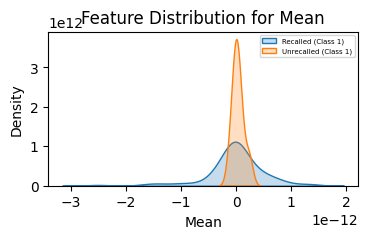

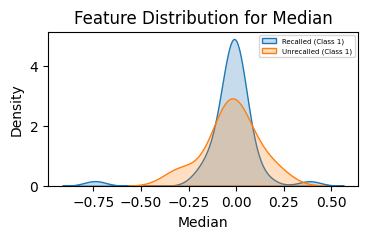

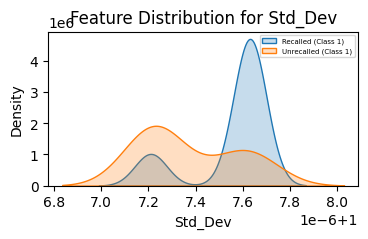

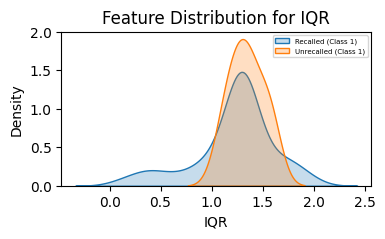

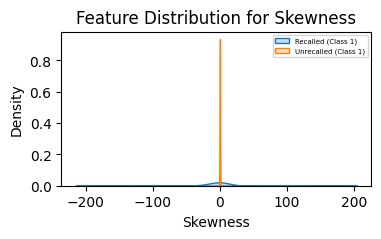

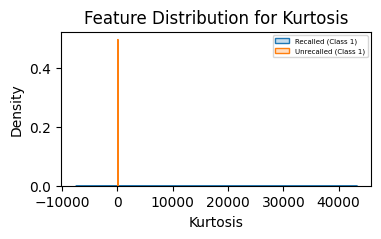

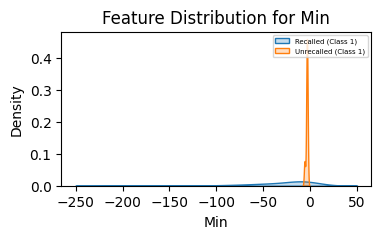

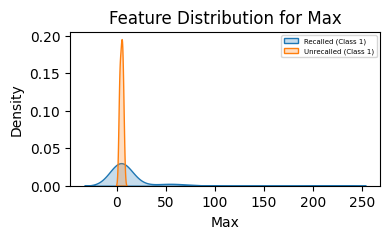

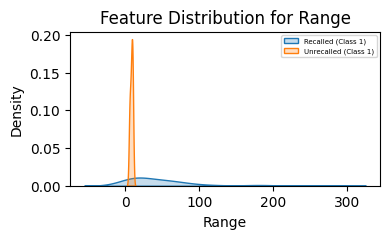

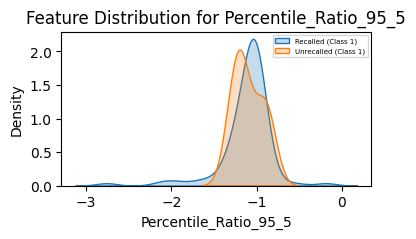

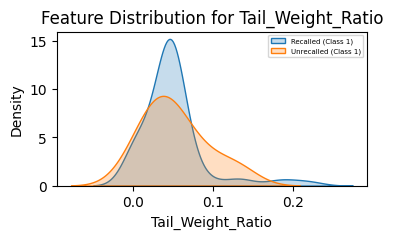

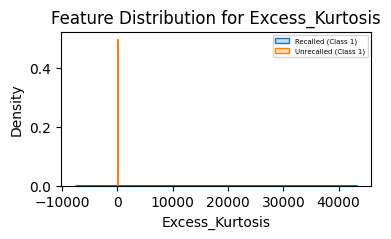

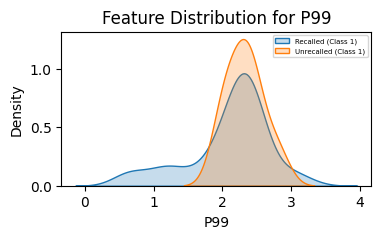

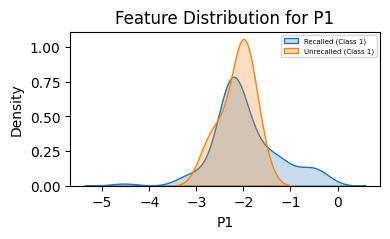

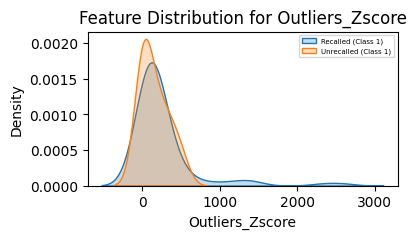

/var/folders/yp/_xstfn5s2nb1lmynh4_4ghmc0000gn/T/ipykernel_42493/3068278303.py:10: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(unrecalled_points[feature], label='Unrecalled (Class 1)', shade=True)


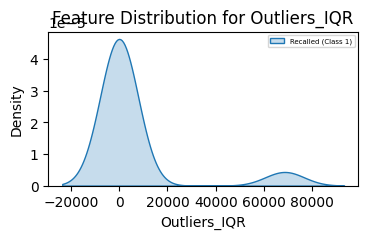

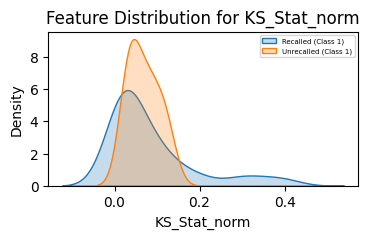

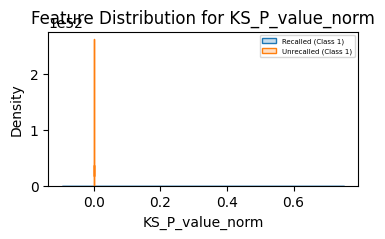

In [88]:
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

feature_importance = model.feature_importances_

# Compare the feature distribution between correctly classified and unrecalled points
for feature in X_test.columns:
    plt.figure(figsize=(4, 2))
    sns.kdeplot(recalled_points[feature], label='Recalled (Class 1)', shade=True)
    sns.kdeplot(unrecalled_points[feature], label='Unrecalled (Class 1)', shade=True)
    plt.title(f'Feature Distribution for {feature}')
    plt.legend(prop={'size': 5})
    plt.show()

# Feature experimenting using crossing and dropping

In [44]:
def feature_crossing(train, test):
    dfs = [train.copy(), test.copy()]
    for df in dfs:
        df['skewness_kurtosis'] = df['Skewness'] * df['Kurtosis']
        df['skewness_range'] = df['Skewness'] * df['Range']
        df['kurtosis_range'] = df['Kurtosis'] * df['Range']
        df['iqr_skewness'] = df['IQR'] * df['Skewness']
        df['mean_kurtosis'] = df['Mean'] * df['Kurtosis']
        df['std_dev_per_ratio']= df['Std_Dev'] * df['Percentile_Ratio_95_5']
    return dfs

In [49]:
result = feature_crossing(X_train, X_test)
X_train2 = result[0]
X_test2 = result[1]

In [54]:
from sklearn.ensemble import RandomForestClassifier

new_model = RandomForestClassifier()

new_model.fit(X_train2, y_train)

y_pred2 = new_model.predict(X_test2)

In [55]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))

Accuracy: 0.9073170731707317
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       105
           1       0.91      0.90      0.90       100

    accuracy                           0.91       205
   macro avg       0.91      0.91      0.91       205
weighted avg       0.91      0.91      0.91       205



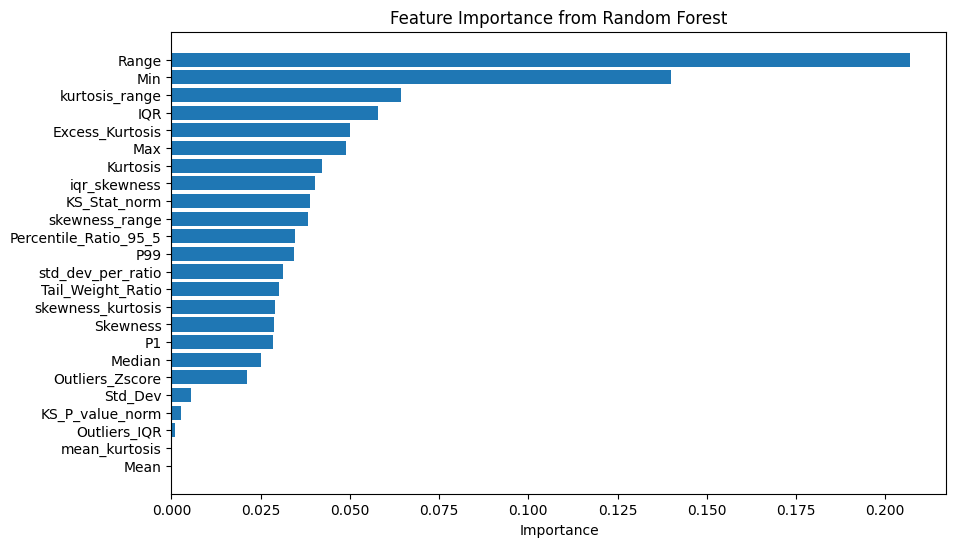

In [61]:
import pandas as pd
import matplotlib as plt

importances2 = new_model.feature_importances_

importance_df2 = pd.DataFrame({
    'Feature': X_train2.columns,
    'Importance': importances2
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df2['Feature'], importance_df2['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [69]:
# least importance features
to_drop = list(importance_df2.sort_values(by='Importance', ascending=True)[:5]['Feature'])

In [74]:
to_drop

['Mean', 'mean_kurtosis', 'Outliers_IQR', 'KS_P_value_norm', 'Std_Dev']

In [75]:
def feature_dropping(train, test, variables: list):
    train_dropped = train.drop(variables, axis=1)
    test_dropped = test.drop(variables, axis=1)
    return train_dropped, test_dropped

In [76]:
dropped = feature_dropping(X_train2, X_test2, to_drop)

X_train3 = dropped[0]
X_test3 = dropped[1]

In [77]:
X_test3

,Median,IQR,Skewness,Kurtosis,Min,Max,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,KS_Stat_norm,skewness_kurtosis,skewness_range,kurtosis_range,iqr_skewness,std_dev_per_ratio
527,0.113753,0.930576,-0.499187,0.594065,-3.692641,3.886100,7.578741,-0.697818,0.168047,-2.405935,2.290241,-2.582765,122,0.108621,-2.965494e-01,-3.783209,4.502263e+00,-0.464532,-0.697824
359,-0.078216,1.235182,0.201443,-0.117412,-3.509277,3.901816,7.411094,-1.074347,0.053432,-3.117412,2.392149,-2.274095,118,0.065308,-2.365186e-02,1.492914,-8.701519e-01,0.248819,-1.074355
447,0.119302,1.671343,-0.180367,-0.636339,-3.641220,3.879824,7.521045,-0.974258,0.005247,-3.636339,1.929924,-2.248434,27,0.075251,1.147744e-01,-1.356547,-4.785932e+00,-0.301455,-0.974265
31,0.044233,1.398054,0.041210,-0.322630,-2.938284,3.213156,6.151440,-1.111219,0.024070,-3.322630,2.281120,-2.006247,7,0.051654,-1.329564e-02,0.253502,-1.984642e+00,0.057614,-1.111228
621,-0.003865,1.167158,-3.935377,69.072493,-18.890386,14.157757,33.048143,-1.065152,0.045055,66.072493,2.086128,-1.961411,82,0.037977,-2.718263e+02,-130.056887,2.282718e+03,-4.593207,-1.065160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,-0.013226,1.102280,0.106864,2.157362,-5.621342,6.667513,12.288855,-1.041006,0.090279,-0.842638,2.822269,-2.720367,933,0.045149,2.305451e-01,1.313240,2.651151e+01,0.117794,-1.041014
796,-0.056146,1.591054,-0.065137,-0.642157,-4.774281,2.770497,7.544778,-1.010895,0.007010,-3.642157,1.946184,-2.208161,87,0.049208,4.182830e-02,-0.491446,-4.844931e+00,-0.103637,-1.010903
644,0.004068,0.953031,-81.110783,14020.874352,-174.022188,3.078982,177.101170,-1.002406,0.049321,14017.874352,1.710256,-1.702509,8,0.083005,-1.137244e+06,-14364.814517,2.483113e+06,-77.301053,-1.002414
404,-0.083456,1.293424,0.496554,0.575611,-3.336466,6.471190,9.807656,-1.189083,0.054889,-2.424389,2.693030,-2.033317,379,0.037151,2.858221e-01,4.870032,5.645396e+00,0.642255,-1.189092


In [78]:
from sklearn.ensemble import RandomForestClassifier

newer_model = RandomForestClassifier()

newer_model.fit(X_train3, y_train)

y_pred3 = newer_model.predict(X_test3)

In [79]:
# Evaluate the model
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred3))
print("Classification Report:\n", classification_report(y_test, y_pred3))

Accuracy: 0.9219512195121952
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       105
           1       0.92      0.92      0.92       100

    accuracy                           0.92       205
   macro avg       0.92      0.92      0.92       205
weighted avg       0.92      0.92      0.92       205



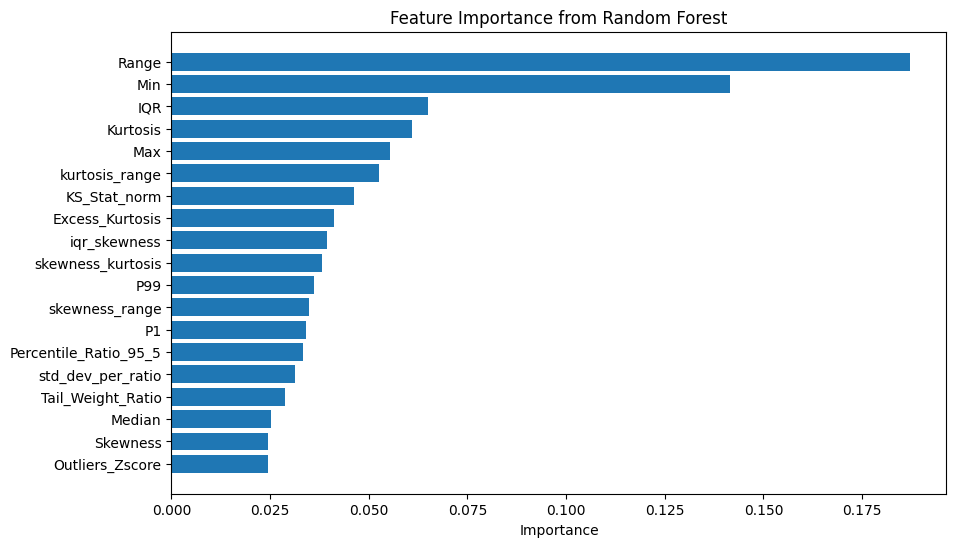

In [81]:
import pandas as pd
import matplotlib as plt

importances3 = newer_model.feature_importances_

importance_df3 = pd.DataFrame({
    'Feature': X_train3.columns,
    'Importance': importances3
}).sort_values(by='Importance', ascending=True)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df3['Feature'], importance_df3['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance from Random Forest')
plt.show()

In [89]:
# for positive class (outlier/longtail)
unrecalled_mask = (y_test == 1) & (y_pred3 != 1)
unrecalled_points = X_test3[unrecalled_mask]

recalled_mask = (y_test == 1) & (y_pred3 == 1)
recalled_points = X_test3[recalled_mask]

# for negative class (other distributions)
negative_mask = (y_test == 0) & (y_pred3 == 0)
negative_points = X_test3[negative_mask]

In [90]:
unrecalled_points.describe()

,Median,IQR,Skewness,Kurtosis,Min,Max,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,KS_Stat_norm,skewness_kurtosis,skewness_range,kurtosis_range,iqr_skewness,std_dev_per_ratio
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,-0.078800,1.431605,0.146835,3.006164,-3.795767,7.290176,11.085944,-1.118247,0.044334,0.006164,2.086851,-2.051286,107.750000,0.101596,3.610145,5.125700,109.503818,0.272836,-1.118255
std,0.278788,0.273030,0.468996,8.913178,1.073678,9.475378,9.841328,0.254080,0.045781,8.913178,0.414487,0.600868,119.533319,0.117078,10.201351,14.437949,311.380538,0.861022,0.254082
min,-0.738044,1.101479,-0.388876,-0.871140,-5.582783,2.501879,5.488017,-1.646401,0.000626,-3.871140,1.215116,-2.772803,0.000000,0.030258,-0.135369,-3.571553,-4.844931,-0.545732,-1.646413
25%,-0.056800,1.245916,-0.090669,-0.304194,-4.676845,2.843999,6.892450,-1.196362,0.005839,-3.304194,1.969069,-2.291959,21.500000,0.044762,-0.033544,-0.598070,-2.242712,-0.143705,-1.196371
50%,-0.022344,1.390977,0.017620,-0.127852,-3.399569,4.069880,8.194546,-1.072149,0.033786,-3.127852,2.112612,-2.139308,64.000000,0.063973,0.025195,0.235848,-0.893165,0.022753,-1.072157
75%,0.023910,1.581117,0.278639,0.418276,-3.082759,5.524737,9.258990,-0.956367,0.066593,-2.581724,2.398579,-1.954110,161.750000,0.088312,0.077004,2.448051,3.788125,0.374337,-0.956375
max,0.193092,1.953161,1.152734,25.032957,-2.619517,30.512528,35.156893,-0.866171,0.128932,22.032957,2.533785,-0.738044,331.000000,0.383657,28.856346,40.526555,880.080980,2.251475,-0.866177


In [91]:
recalled_points.describe()

,Median,IQR,Skewness,Kurtosis,Min,Max,Range,Percentile_Ratio_95_5,Tail_Weight_Ratio,Excess_Kurtosis,P99,P1,Outliers_Zscore,KS_Stat_norm,skewness_kurtosis,skewness_range,kurtosis_range,iqr_skewness,std_dev_per_ratio
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000,9.200000e+01,92.000000,9.200000e+01,92.000000,92.000000
mean,-0.022324,1.212605,-9.784132,1951.037599,-34.314482,12.702219,47.016701,-1.120070,0.050599,1948.037599,2.116984,-1.973270,263.576087,0.083422,-1.121737e+05,-1095.406545,3.438315e+05,-5.246803,-1.120079
std,0.120779,0.376176,36.692953,6283.079318,42.822053,27.706618,49.681718,0.296890,0.040724,6283.079318,0.582614,0.689002,432.416497,0.098926,1.008275e+06,7115.471350,1.353695e+06,19.899536,0.296892
min,-0.745631,0.131319,-170.866417,-1.096752,-198.429891,0.709779,4.363679,-2.760089,0.000395,-4.096752,0.571973,-4.532855,2.000000,0.002858,-5.364529e+06,-34124.647297,-6.373784e+00,-81.635361,-2.760109
25%,-0.044698,1.150936,-3.745406,0.448824,-47.139266,3.433076,11.253704,-1.203878,0.033125,-2.551176,2.003048,-2.288584,43.750000,0.017497,-6.661828e+02,-204.871476,5.468004e+00,-4.799340,-1.203887
50%,-0.009018,1.296084,-0.191551,18.195714,-15.712988,4.463116,31.986305,-1.052139,0.045228,15.195714,2.282311,-2.161561,160.500000,0.038073,-5.241432e-01,-5.171098,5.526516e+02,-0.281700,-1.052147
75%,0.006798,1.341020,0.217145,278.076466,-5.840876,6.536538,62.076857,-0.999942,0.053270,275.076466,2.420238,-1.704070,225.000000,0.114966,2.102327e-02,2.148214,1.754682e+04,0.363595,-0.999950
max,0.396948,1.961446,160.482471,35701.713870,-1.272076,219.816872,265.242062,-0.187160,0.225069,35698.713870,3.253290,-0.247835,2587.000000,0.414055,5.729499e+06,42566.701647,9.469596e+06,100.626851,-0.187161


In [1]:
import pickle

with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(newer_model, file)